In [2]:
import pandas as pd
from pvlib.iotools import read_epw

In [ ]:
# TODO: Clean weather data to match some frequency and interpolate it to match sun position

file_test = '/workspace/weather/AUS_QLD_Brisbane.945760_TMYx.2009-2023.epw'

data, metadata = read_epw(file_test)

# Example: Assume `weather_df` is your datetime-indexed DataFrame
df = data.copy()
df = df.sort_index()  # ensure time is in order

# Calculate the time difference between each timestamp and the previous one
df['time_diff'] = df.index.to_series().diff()

# A new block starts when the gap is not 1 hour
df['block_id'] = (df['time_diff'] != pd.Timedelta(hours=1)).cumsum()

# Find the block with the most rows (i.e., longest continuous block)
longest_block_id = df['block_id'].value_counts().idxmax()

# Extract the longest block
longest_block = df[df['block_id'] ==
                   longest_block_id].drop(columns='time_diff')

# Optional: Drop the helper column if you want
longest_block = longest_block.drop(columns='block_id')

<Axes: >

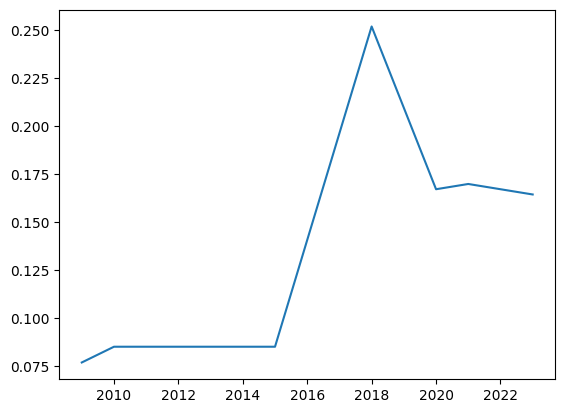

In [ ]:
# Plot day of the years for data we have
x = data.groupby(data.index.year).count()/(365*24)
x['year'].plot()

In [ ]:
# Try interpolating weather data
df_reindexed = data.reindex(pd.date_range(start=data.index.min(),
                                          end=data.index.max(),
                                          freq='1h'))
df_reindexed.interpolate(method='linear')